### Importing Libararies

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import missingno
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

### Loading Scraped Data From Flipkart.com
https://github.com/Dawood006/Laptop-Price-Benchmark-App/blob/baea55f9b83eb685bd465e4185d95bdba2118e57/Web%20Scrape/Laptop_web_scrape.ipynb

In [11]:
df=pd.read_csv('lappy2.csv')

In [12]:
pd.set_option('display.max_columns',None)

In [13]:
df.head(1)

,Unnamed: 0,index,Covered in Warranty,Warranty Service Type,Processor Variant,Clock Speed,Finger Print Sensor,MS Office Provided,Weight,Processor Generation,Screen Resolution,Not Covered in Warranty,Speakers,Sales Package,Disk Drive,Suitable For,Backlit Keyboard,Touchscreen,Processor Name,Bluetooth,RAM Type,Screen Type,id,Domestic Warranty,Series,Operating System,Model Number,Screen Size,USB Port,SSD,Processor Brand,Internal Mic,Wireless LAN,Storage Type,Color,Battery Cell,Type,Keyboard,SSD Capacity,Warranty Summary,Model Name,Part Number,RAM,Graphic Processor,Web Camera,Power Supply,HDMI Port,Dimensions,OS Architecture,Face Recognition,Pointer Device,EMMC Storage Capacity,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Refresh Rate,Battery Backup,Ethernet,Expandable Memory,Expandable SSD Capacity,Supported Operating System,Cache,Number of Cores,Mic In,Additional Features,Memory Slots,RAM Frequency,RJ45,Sound Properties,Lock Port,Security Chip,Chipset,RPM,Multi Card Slot,Hardware Interface,Sound Chip,Included Software,Antivirus,Inbuilt 4G LTE,Stylus Included,NFC Support,Wireless WAN,Laptop Bag,System Architecture,Brightness,RJ11,VGA Port,Color Gamut,TGP,Other Accessories,International Warranty,HDD Capacity,Dock Port,Firewire Port,Read/Write Speed,S-video,Certification,Recovery Options,Optane Memory,Rating,price,Link,Names
0,0,0,Manufacturing Defects,Carry-in,N305,Max Frequency Up to 3.8 GHz,NaN,No,1.43 Kg,NaN,1920 x 1080 Pixel,Physical damage,Yes,"Laptop, Power Adaptor, User Guide, Warranty Do...",Not Available,Processing & Multitasking,No,No,Core i3,v5.2,LPDDR5,Full HD IPS LED-backlit LCD Dislpay,0,NaN,Chromebook Plus Google AI,Chrome,CB514-4H-39T7,35.56 cm (14 Inch),"2 x USB 3.2 Gen 1 Type-A port, 2 x USB 3.2 Gen...",Yes,Intel,Yes,Intel Wireless Wi-Fi 6E AX211,SSD,Steel Gray,3 Cell,Chromebook,Acer FineTip keyboard with international langu...,256 GB,1 Year Carry-in Warranty,Chromebook Plus,NX.KUTSI.002,8 GB,Intel Integrated UHD,"FHD camera, 1920 x 1080 Resolution, 1080p vide...",45 W,NaN,326.87 x 224.93 x 20.5 mm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,"₹19,990",https://www.flipkart.com/acer-chromebook-plus-...,Acer Chromebook Plus Google AI Intel Core i3 N...


### Elimanting Duplicates


In [15]:
len(df) # With Repeated Products

960

In [16]:
df.drop(columns=['Unnamed: 0','index','id','Link'],axis=1,inplace=True) 

In [17]:
df.duplicated().value_counts() #After dropping Links,index,id

False    548
True     412
Name: count, dtype: int64

In [18]:
df.drop_duplicates(inplace=True) #Filltered DATA
len(df)

548

### Checking columns having more than 80% Emptiness (NULL values)

In [20]:
for i in df.columns:
    if round(df[i].isna().sum()/len(df)*100,2)>80:
        print(f'{i} >> {round(df[i].isna().sum()/len(df)*100,2)}')


Face Recognition >> 88.5
EMMC Storage Capacity >> 97.99
Refresh Rate >> 88.32
Ethernet >> 88.5
Expandable Memory >> 81.02
Expandable SSD Capacity >> 95.26
Memory Slots >> 86.5
RJ45 >> 82.66
Lock Port >> 95.8
Security Chip >> 88.69
Chipset >> 89.05
RPM >> 92.34
Multi Card Slot >> 84.85
Hardware Interface >> 81.75
Sound Chip >> 92.7
Antivirus >> 96.17
Inbuilt 4G LTE >> 96.35
Stylus Included >> 95.44
NFC Support >> 95.44
Wireless WAN >> 95.26
Laptop Bag >> 89.42
System Architecture >> 81.39
Brightness >> 95.8
RJ11 >> 95.26
VGA Port >> 95.26
Color Gamut >> 97.08
TGP >> 97.63
Other Accessories >> 97.81
International Warranty >> 97.81
HDD Capacity >> 97.08
Dock Port >> 97.63
Firewire Port >> 97.81
Read/Write Speed >> 99.82
S-video >> 98.36
Certification >> 99.09
Recovery Options >> 97.45
Optane Memory >> 99.82


### Dropping 
#### Empty & Unecessary columns 👇

In [22]:
df.drop(columns=['Refresh Rate','RPM',
'Inbuilt 4G LTE',
'NFC Support',
'Lock Port',
'TGP',
'Antivirus',
'Brightness', 
'EMMC Storage Capacity',
'International Warranty',
'Stylus Included',
'S-video',
'Dock Port',
'Firewire Port',
'RJ11',
'VGA Port',
'Read/Write Speed',
'Color Gamut',
'Recovery Options',
'Certification',
'Optane Memory',
'Refresh Rate',
'Ethernet',
'Laptop Bag',
'Security Chip',
'Sound Chip',
'Sound Properties',
'RJ45',
'Multi Card Slot',
'Memory Slots',
'Hardware Interface',
'Battery Backup',
'Power Supply',
'Mic In',
'Pointer Device',
'Additional Features',
'Battery Cell',
'Cache',
'Internal Mic',
'Keyboard',
'Clock Speed',
'HDMI Port',
'Speakers',
'Wireless LAN',
'Warranty Service Type','Wireless WAN',  
'Not Covered in Warranty',
'Disk Drive','Web Camera','Bluetooth','Sales Package','Color','Part Number'],axis=1,inplace=True)


## Transforming Data 👇

##### (  _We are converting all relevant features in the dataset into numeric formats wherever possible. This transformation is necessary because linear models require numeric input to perform calculations and make predictions. By encoding categorical variables, scaling numerical values, and handling text or datetime features appropriately, we ensure that the data is compatible with linear modeling techniques. This step will help us build a robust and interpretable model._  )

In [25]:
df.columns


Index(['Covered in Warranty', 'Processor Variant', 'Finger Print Sensor',
       'MS Office Provided', 'Weight', 'Processor Generation',
       'Screen Resolution', 'Suitable For', 'Backlit Keyboard', 'Touchscreen',
       'Processor Name', 'RAM Type', 'Screen Type', 'Domestic Warranty',
       'Series', 'Operating System', 'Model Number', 'Screen Size', 'USB Port',
       'SSD', 'Processor Brand', 'Storage Type', 'Type', 'SSD Capacity',
       'Warranty Summary', 'Model Name', 'RAM', 'Graphic Processor',
       'Dimensions', 'OS Architecture', 'Face Recognition',
       'Dedicated Graphic Memory Type', 'Dedicated Graphic Memory Capacity',
       'Expandable Memory', 'Expandable SSD Capacity',
       'Supported Operating System', 'Number of Cores', 'RAM Frequency',
       'Chipset', 'Included Software', 'System Architecture',
       'Other Accessories', 'HDD Capacity', 'Rating', 'price', 'Names'],
      dtype='object')

#### 1) _Finger Print Sensor_

In [27]:
df['Finger Print Sensor'].unique()

array([nan, 'No', 'Yes'], dtype=object)

NULL values >> 340 (not included 👇)->we will impute this as NO 
Axes(0.22375,0.11;0.5775x0.77)


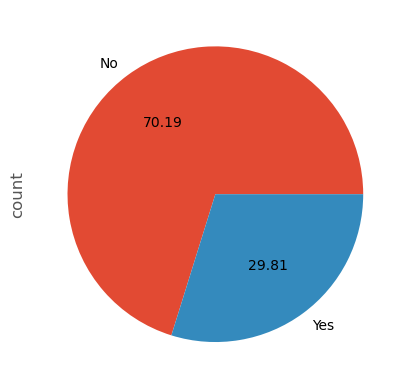

In [28]:

print(f'NULL values >> {df['Finger Print Sensor'].isnull().sum()} (not included 👇)->we will impute this as NO \n{df['Finger Print Sensor'].value_counts().plot(kind='pie',autopct='%.2f')}')


In [29]:
df['Finger Print Sensor'].fillna(value='No',inplace=True);

In [30]:
df['Finger Print Sensor']=pd.get_dummies(df['Finger Print Sensor'],drop_first='No').astype(int)

In [31]:
df['Finger Print Sensor'].value_counts()

Finger Print Sensor
0    486
1     62
Name: count, dtype: int64

#### 2) _Face Recognition_

In [33]:
df['Face Recognition'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [34]:
df['Face Recognition'].value_counts()# Apart from being 80% NULL we will still consider this a Feature

Face Recognition
No     58
Yes     5
Name: count, dtype: int64

In [35]:
df['Face Recognition'].fillna('No',inplace=True)

In [36]:
df['Face Recognition']=pd.get_dummies(df['Face Recognition'],drop_first='No').astype(int)

#### 3) *Price*

In [38]:
df.price.sample() #Removing the currency sign

269    ₹49,490
Name: price, dtype: object

In [39]:
df['Price']=df.price.apply(lambda x:x.split('₹')[1])
df['Price']=df.Price.apply(lambda x :x.split(',')[0]+x.split(',')[1]  if len(x.split(','))<3 else x.split(',')[0]+x.split(',')[1]+x.split(',')[2])
df.drop(columns=['price'],axis=1,inplace=True)

In [40]:
df['Price']=df['Price'].astype(int)

In [41]:
df.Price.sample()

209    104990
Name: Price, dtype: int32

#### 4) *RAM*

In [43]:
df['RAM (GB)']=df.RAM.apply(lambda x :x.split(' ')[0]) #Converting to Numberic by removing GB from data
df['RAM (GB)']=df['RAM (GB)'].astype(int)

In [44]:
df['RAM (GB)'].unique()


array([ 8, 16,  4, 32, 24, 12, 18, 36, 64])

#### 5.) *Cores*

In [46]:
f'Data Filled>> {df['Number of Cores'].value_counts().sum()} Empty >> {df['Number of Cores'].isna().sum()}'

'Data Filled>> 194 Empty >> 354'

In [47]:
df['Number of Cores'].value_counts() #This are Cores which are Mentioned & we already have

Number of Cores
2.0     46
6.0     38
4.0     32
10.0    29
8.0     28
14.0     7
16.0     7
12.0     7
Name: count, dtype: int64

In [48]:
df['Number of Cores'].head(6) # we will check at last that all the data below is filled correctly

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Number of Cores, dtype: float64

In [49]:
df['Processor Name'].unique() # Cores are mentioned in Name itself for some of the Brands like eg.AMD

array(['Core i3', 'Core i5', 'MT8183', 'Celeron Dual Core', 'Core i9',
       'Snapdragon X Plus', 'Ryzen 3 Quad Core', 'Core Ultra 5',
       'Snapdragon X Elite', 'Ryzen 7 Octa Core', 'Ryzen 5 Hexa Core',
       'Ryzen 5 Quad Core', 'Core i7', 'Athlon Dual Core', 'M3',
       'Ryzen 5 Dual Core', 'M2', 'Core Ultra 7', 'MediaTek MT8788',
       'Core 5', 'Pentium Gold', 'M1', 'Core 7', 'Dual Core',
       'Ryzen 3 Dual Core', 'Core Ultra 9', 'Celeron Quad Core', 'M3 Pro',
       'M3 Max', 'Ryzen AI 9 12 Core', 'M4 Max', 'M4 Pro', 'M4',
       'AMD Ryzen Z1 Extreme', 'Pentium Quad Core'], dtype=object)

In [50]:
#Fetching Number of cores from Processor Name

def extract_core(x): 
    
    if len(x.split(' '))==2: #for PRO & MAX variant
        if 'M3 Pro' in x:
            return 12
        elif 'M4 Pro' in x:
            return 14
        elif 'M3 Max' in x or 'M4 Max' in x:
            return 16
        
    x = x.split(' ') #fro AMD & Qualcomm
    if 'Hexa' in x:
        return 6
    elif 'Octa' in x or 'MT8788' in x or 'M1' in x or 'M2' in x or 'M3' in x or 'M4' in x or'MT8183'in x :
        return 8
    elif 'Quad' in x:
        return 4
    elif 'Dual' in x:
        return 2
    elif 'Z1' in x:  
        return 10
    elif '12' in x or 'Elite' in x: 
        return 12
    
   
    else:
        return 0  


In [51]:
df['New_core'] = df['Processor Name'].apply(extract_core)

In [52]:
df['New_core'].value_counts() #new data for Cores

New_core
0     347
4      50
8      49
2      44
6      41
12     11
16      4
14      1
10      1
Name: count, dtype: int64

In [53]:
df[((df['New_core']!=df['Number of Cores'])) &(df['New_core']!=0)][['Number of Cores','New_core']]
      #Incorrect    vs Correct data

,Number of Cores,New_core
2,NaN,8
5,NaN,2
15,NaN,4
18,NaN,4
20,NaN,12
...,...,...
898,NaN,6
924,NaN,2
925,NaN,2
935,NaN,8


In [54]:
df.loc[((df['New_core']!=df['Number of Cores'])) &(df['New_core']!=0)]['New_core'].head(5) #Data which is Completely NEW


2      8
5      2
15     4
18     4
20    12
Name: New_core, dtype: int64

In [55]:
df.loc[(df['New_core'] != df['Number of Cores']) & (df['New_core'] != 0), 'Number of Cores']=df.loc[((df['New_core']!=df['Number of Cores'])) &(df['New_core']!=0)]['New_core']
#Imputing New Values into Missing and Incorrect data in the "Number of Cores" column

In [56]:
df.loc[((df['New_core']!=df['Number of Cores'])) &(df['New_core']!=0)]['Number of Cores']#if empty replaced sucessfully

Series([], Name: Number of Cores, dtype: float64)

In [57]:
#Imputing Mean for rest of The Remaining data

# core_mean=df['Number of Cores'].mean()
df['Number of Cores'].fillna(value=4,inplace=True)#we are assuming the mean to be 4 not 6

In [58]:
df['Number of Cores']=df['Number of Cores'].astype(int)#d_type=> Numberic

In [59]:
df['Number of Cores'].head(6) #we can observe that  mean and new fetched values are sucessfully replaced

0    4
1    4
2    8
3    4
4    4
5    2
Name: Number of Cores, dtype: int32

In [60]:
df.drop(columns=['New_core'],axis=1,inplace=True)# Dropping the same column

In [61]:
df['Number of Cores'].value_counts()

Number of Cores
4     297
2      65
6      62
8      58
10     30
12     17
16     11
14      8
Name: count, dtype: int64

#### 6) _'MS Office Provided'_

In [63]:
df['MS Office Provided'].value_counts()

MS Office Provided
Yes    296
No     252
Name: count, dtype: int64

Filled Yes to Apple products bcoz they got their own 🙃

In [65]:

df.loc[df['Processor Brand'] == 'Apple', 'MS Office Provided'] = df.loc[df['Processor Brand'] == 'Apple', 'MS Office Provided'].fillna(value='Yes',inplace=True)
df[df['Processor Brand']=='Apple']['MS Office Provided'].fillna(value='Yes',inplace=True);


In [66]:
df['MS Office Provided'].fillna(value='Yes',inplace=True);

In [67]:
df['MS Office Provided']=pd.get_dummies(df['MS Office Provided'],drop_first='No').astype(int)

#### 7) _RAM Type_

In [69]:
df['RAM Type'].unique() #Unified is for Apple Products

array(['LPDDR5', 'DDR4', 'LPDDR4X', 'DDR5', 'LPDDR5X', 'LPDDR4',
       'Unified Memory'], dtype=object)

In [70]:
Ranking=[['DDR4','LPDDR4','LPDDR4X','DDR5','LPDDR5', 'LPDDR5X','Unified Memory']] #Ranked Apple Higher than others Bcoz they are Expensive & Brand Value
len(Ranking ) 

1

In [71]:
df['RAM Type Rank']=OrdinalEncoder(categories=Ranking).fit_transform(df[['RAM Type']]).astype(int)

In [72]:
df['RAM Type Rank'].unique() # Transformed

array([4, 0, 2, 3, 5, 1, 6])

#### 8) _Backlit Keyboard_

In [74]:
df['Backlit Keyboard'].unique()

array(['No', 'Yes', nan], dtype=object)

In [75]:
df['Backlit Keyboard'].fillna(value='No',inplace=True)

In [76]:
df['Backlit Keyboard']=pd.get_dummies(df['Backlit Keyboard'],drop_first='No').astype(int)

In [77]:
df['Backlit Keyboard'].unique()#Transformed

array([0, 1])

#### 9) _Touchscreen'_

In [79]:
df['Touchscreen'].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
df['Touchscreen'].isna().sum()

0

In [81]:
df['Touchscreen']=pd.get_dummies(df['Touchscreen'],drop_first='No').astype(int)

In [82]:
df['Touchscreen'].unique()

array([0, 1])

#### 10) _Domestic Warranty_

In [84]:
df['Domestic Warranty'].isna().sum() # we might delete this column later due to less info

291

In [85]:
df['Domestic Warranty'].fillna(value='0',inplace=True)
df['Domestic Warranty'].replace(['12 Months'],['1 Year'],inplace=True)

In [86]:
df['Domestic Warranty_in_year']=df['Domestic Warranty'].apply(lambda x:x.split(' ')[0]).astype(int)

In [87]:
len(df[df['Domestic Warranty_in_year']==0])

291

#### 11) _SSD_

In [89]:
df['SSD Capacity'].unique()

array(['256 GB', '512 GB', nan, '1 TB', '2 TB', '128 GB'], dtype=object)

In [90]:
df['SSD Capacity'].replace(['1 TB','2 TB',np.nan],['1000 GB','2000 GB','0 GB'],inplace=True) #All the data in GB unit

In [91]:
df['SSD (GB)']=df['SSD Capacity'].astype(str).apply(lambda x : x.split(' ')[0]).astype(int)

In [92]:
df['SSD (GB)'].unique()

array([ 256,  512,    0, 1000, 2000,  128])

#### 12) _HDD_

In [94]:
df['HDD Capacity'].unique()

array([nan, '1 TB', '500 GB'], dtype=object)

In [95]:
df['HDD Capacity'].replace(['1 TB',np.nan],['1000 GB','0 GB'],inplace=True)

In [96]:
df['HDD (GB)']=df['HDD Capacity'].astype(str).apply(lambda x : x.split(' ')[0]).astype(int)

In [97]:
df['HDD (GB)'].unique()#Transformed

array([   0, 1000,  500])

#### 13) _Expandable Memory_

In [99]:
df['Expandable Memory'].value_counts() #Extracting all the Numbers Possible 👇

Expandable Memory
16 GB                                        21
32 GB                                        12
32                                           11
16                                            8
Upto 16 GB                                    7
Upto 32 GB                                    6
64 GB                                         6
Upto 64 GB                                    5
16GB                                          4
8                                             4
8 GB                                          3
Upto 12 GB                                    2
32GB                                          2
1tb                                           1
Upto 1 TB                                     1
Yes                                           1
12                                            1
Upto 24 GB                                    1
up to 512 GB                                  1
Non Upgradable                                1
No                    

In [100]:
df[df['Expandable Memory']=='Yes']['Names']

165    HP 15s AMD Ryzen 3 Quad Core 5300U - (8 GB/512...
Name: Names, dtype: object

In [101]:
df['Expandable Memory'].replace(['Non Upgradable','No','Yes','Upto 1 TB','1tb'],['0 GB','0 GB','8 GB','1000 GB','1000 GB'],inplace=True)#Replacing no as a 0 GB input

In [102]:
x=df['Expandable Memory'].astype(str).apply(lambda x: (''.join(i  if i.isdigit() else ' ' for i in x).split()))#Fetching only Numbers/digits

In [103]:
df['Expandable Memory (GB)']=[i[0] if len(i)>=1 else np.nan for i in x]

In [104]:
df['Expandable Memory (GB)'].fillna(value=0,inplace=True)

In [105]:
df['Expandable Memory (GB)']=df['Expandable Memory (GB)'].astype(int)

In [106]:
df['Expandable Memory (GB)'].value_counts()

Expandable Memory (GB)
0       446
16       40
32       31
64       13
8         8
12        3
1000      2
40        2
24        1
512       1
128       1
Name: count, dtype: int64

#### 14) _BRAND NAMES_

In [108]:
df['Names'].apply(lambda x:x.split(' ')[0]).value_counts()#Every Product starts from Brand Name each Name holds value

Names
HP           116
Lenovo       106
ASUS          91
Acer          70
MSI           48
DELL          41
Apple         23
Infinix       13
MICROSOFT     10
SAMSUNG        8
CHUWI          4
Colorful       3
Ultimus        3
Thomson        2
ZEBRONICS      2
WINGS          2
Avita          2
GIGABYTE       1
Primebook      1
FUTOPIA        1
AXL            1
Name: count, dtype: int64

In [109]:
df['BRAND']=df['Names'].apply(lambda x:x.split(' ')[0])

##### **Brands that have less products/Laptops are considered under "Others"**

In [111]:
other=df.groupby(['BRAND']).agg(count=('BRAND','count')).sort_values(by='count',ascending=True).reset_index().head(11)
other=list(other.BRAND)


In [112]:
df['Brand_Names'] = df['Names'].apply(lambda x: 'others' if x.split(' ')[0] in other else x.split(' ')[0])


In [113]:
df['Brand_Names'].unique()

array(['Acer', 'HP', 'MSI', 'Lenovo', 'ASUS', 'others', 'DELL',
       'MICROSOFT', 'Infinix', 'Apple', 'SAMSUNG'], dtype=object)

In [114]:
# pd.get_dummies(df['BRAND']).astype(int)
dummies = pd.get_dummies(df['Brand_Names']).astype(int)
df = df.join(dummies)


#### 15) _'Screen Size_

In [116]:
df['Screen Size'].isnull().sum()

0

In [117]:
df['Screen Size'].sample()#we will deal with inch as it easy to take from User

250    40.64 cm (16 inch)
Name: Screen Size, dtype: object

In [118]:
df['Screen Size (Inch)']=df['Screen Size'].apply(lambda x: x.split('(')[1].split(')')[0] if '(' in x else None)


In [119]:
df['Screen Size (Inch)']=df['Screen Size (Inch)'].apply(lambda x:x.split(' ')[0]).astype(float)

In [120]:
df['Screen Size (Inch)'].sample() #Inches

650    15.6
Name: Screen Size (Inch), dtype: float64

#### 16) _Storage_

In [122]:
df['Storage Type'].value_counts()

Storage Type
SSD       529
eMMC        7
HDD         7
Hybrid      5
Name: count, dtype: int64

In [123]:
Storage=pd.get_dummies(df['Storage Type'],prefix='drive').astype(int)

In [124]:
df=df.join(Storage)

#### 17) _Processor Generation_

In [126]:
df['Processor Generation'].unique() #these are ONLY Intel Generation we might delete this column afterwards

array([nan, '12th Gen', '13th Gen', '11th Gen', '10th Gen', '7th Gen',
       '14th Gen', '5th Gen', '4th Gen', '1st Gen', '3rd Gen', '8th Gen',
       '9th Gen'], dtype=object)

In [127]:
pg=df['Processor Generation'].astype(str).apply(lambda x : ''.join(i if i.isdigit() else ' ' for i in x).split())

In [128]:
df['Processor Generation_intel']=[i[0] if len(i)>=1 else 0 for i in pg]

In [129]:
df['Processor Generation_intel']=df['Processor Generation_intel'].astype(int)

In [130]:
df['Processor Generation_intel']

0       0
1      12
2       0
3      12
4      12
       ..
950    12
951    12
955    12
958     0
959    13
Name: Processor Generation_intel, Length: 548, dtype: int32

#### 18) _Dedicated Graphic Memory Capacity_

In [132]:
df['Dedicated Graphic Memory Capacity'].value_counts() # Mostly they dont offer Graphic memory Capacity which is why it makes Product Expensive 

Dedicated Graphic Memory Capacity
4 GB      60
6 GB      40
8 GB      23
2 GB       3
1 GB       2
512 MB     1
128 MB     1
12 GB      1
Name: count, dtype: int64

In [133]:
df[df['Dedicated Graphic Memory Capacity']=='12 GB']['BRAND']

901    MSI
Name: BRAND, dtype: object

In [134]:
df['Dedicated Graphic Memory Capacity'].unique()

array([nan, '4 GB', '8 GB', '6 GB', '1 GB', '2 GB', '512 MB', '128 MB',
       '12 GB'], dtype=object)

In [135]:
df['Dedicated Graphic Memory Capacity'].replace(['512 MB', '128 MB',np.nan],['0.512 GB','0.128 GB','0 GB'],inplace=True)#All the data in GB unit

In [136]:
df['Dedicated Graphic Memory Capacity (GB)']=df['Dedicated Graphic Memory Capacity'].apply(lambda x : x.split(' ')[0]).astype(float)

In [137]:
df['Dedicated Graphic Memory Capacity (GB)'].value_counts()

Dedicated Graphic Memory Capacity (GB)
0.000     417
4.000      60
6.000      40
8.000      23
2.000       3
1.000       2
0.512       1
0.128       1
12.000      1
Name: count, dtype: int64

#### 19) _Processor Brand_

In [139]:
df['Processor Brand'].isna().sum()

0

In [140]:
df['Processor Brand'].unique()

array(['Intel', 'MediaTek', 'Qualcomm', 'AMD', 'Apple'], dtype=object)

In [141]:
Processor=pd.get_dummies(df['Processor Brand'],prefix='Processor').astype(int)

In [142]:
df['Processor Brand'].value_counts()

Processor Brand
Intel       372
AMD         142
Apple        23
Qualcomm      9
MediaTek      2
Name: count, dtype: int64

In [143]:
df=df.join(Processor)


#### 20) _Apple chip_

In [145]:
df[df['Processor Brand']=='Apple']['Processor Name'].unique()# Each variant holds significant growth in Price and ingeneral in performance like Generation in Intel

array(['M3', 'M2', 'M1', 'M3 Pro', 'M3 Max', 'M4 Max', 'M4 Pro', 'M4'],
      dtype=object)

In [146]:
def extractt(x):
    number=''.join(i if i.isdigit() else ' ' for i in x)
    sep=number.split()
    if len(sep)>=2:
        return sep[0]+'.'+sep[1]

    else:
        return sep[0]

In [147]:
df[df['Processor Brand']=='Apple']['Processor Name'].replace(['M3 Pro','M3 Max','M4 Pro','M4 Max'],['3.5','3.75','4.5','4.75']).apply(extractt).astype(float)

118    3.00
161    2.00
358    1.00
565    3.00
568    3.50
575    3.00
578    3.50
591    3.00
638    3.00
644    3.00
651    3.75
654    3.75
661    3.50
674    3.50
681    3.75
725    4.75
729    4.50
731    3.00
744    4.00
768    4.00
774    3.00
781    3.00
935    3.00
Name: Processor Name, dtype: float64

In [148]:
df['Apple_chips']=df[df['Processor Brand']=='Apple']['Processor Name'].replace(['M3 Pro','M3 Max','M4 Pro','M4 Max'],['3.5','3.75','4.5','4.75']).apply(extractt).astype(float)

In [149]:
df['Apple_chips'].fillna(value=0,inplace=True)

#### 21) _Variant processor_

In [151]:
df['Processor Variant'].unique()

array(['N305', '1235U', nan, '12450H', '1215U', 'N4020', '1334U',
       '13980HX', '13500H', 'X1P 42 100', '7320U', '13420H', '125H',
       'X1E 78 100', '5700U', '5500U', '7535HS', '7730U', '7520U',
       '1315U', '7435HS', '1305U', '1115G4', '7735HS', '5625U', '1255U',
       '12650H', '7840HS', '7430U', '12 gen', '7330U', '5300U', '11260H',
       '11400H', '7120U', '12500H', '7530U', '125U', '1355U', '3500u',
       '155H', '1035G7', 'N4500', '13620H', '1335U', '13700H', '12450HX',
       '13700HX', '7235HS', 'MT8788', '120U', '4500u',
       '1315U Turbo Boost with Finger Print', '1340P',
       'AMD Ryzen 5 5500U', 'Intel Core i3-1215U', '12700H', '5600H',
       '1165G7', '1005G1', '7505', '10210U', '1360P', 'Apple M1 Chip',
       '150U', '14700HX', 'Core i5', 'Upto 2.8GHz', 'Core™ i3-1115G4',
       '3250U', '185H', '8845HS', '1260P', '7535U',
       '13th Generation Intel® Core™ i7-1355U Processor (12MB Cache, up to 5.00 GHz)',
       '1340p', '13650HX', '4417U', '3050U', 

In [152]:
# H-series is for HIGH performance, U-series is Balanced & N-series is Entry level
def extract_variant(x):
    x = str(x)
    if 'U' in x:
        return 2
    elif 'H'in x or 'HX'in x or'HS'in x:
        return 3
    elif 'N' in x:
        return 1
    else:
        return 0

In [153]:
df['Processor_variant_new']=df['Processor Variant'].astype(str).apply(lambda x : ''.join(i if i.isalpha() else ' ' for i in x).split()).apply(extract_variant)

In [154]:
df['Processor_variant_new'].unique() #Transformed

array([1, 2, 0, 3], dtype=int64)

#### 22) _Expandable SSD Capacity_

In [156]:
df['Expandable SSD Capacity'].value_counts()#90% null still makes big differnce in Price

Expandable SSD Capacity
1 TB      14
2 TB       8
512 GB     2
4 TB       1
6 TB       1
Name: count, dtype: int64

In [157]:
df['Expandable SSD Capacity'].fillna(value='0 GB',inplace=True)
df['Expandable SSD Capacity (GB)']=df['Expandable SSD Capacity'].astype(str).apply(lambda x: x.split(' ')[0]).replace(['1','2','4','6'],['1000','2000','4000','6000'])

In [158]:
df['Expandable SSD Capacity (GB)']=df['Expandable SSD Capacity (GB)'].astype(int)

#### 23) _Graphic Processor Companies_

In [160]:
df['Graphic Processor'].unique() #we will consider only Brand Names for GPU which can be easily fetch as it is at the Start especially NVIDIA

array(['Intel Integrated UHD', 'Intel Integrated Intel Graphics',
       'MediaTek Integrated ARM Mali G72 MP3 Graphics',
       'NVIDIA GeForce RTX 2050',
       'Intel Integrated Integrated Intel® UHD Graphics',
       'NVIDIA GeForce RTX 4060', 'Intel Integrated Iris Xe', nan,
       'AMD Radeon AMD', 'Intel Integrated Arc Graphics',
       'Intel Integrated Integrated', 'NVIDIA GeForce RTX 3050',
       'Intel Integrated Arc', 'AMD Radeon AMD RADEON',
       'AMD Radeon AMD Radeon™ Graphics', 'NA Intel',
       'NVIDIA GeForce RTX 4050', 'AMD Radeon 610M', 'Intel Integrated',
       'Intel Integrated AMD', 'Intel Integrated UHD Graphics',
       'Intel Integrated Graphics', 'AMD Radeon Radeon',
       'Intel Integrated Not Available',
       'MediaTek Integrated ARM Mali G72',
       'Intel Integrated Intel IrisXe Graphics',
       'Intel Integrated NVIDIA', 'Intel Integrated Intel UHD Graphics',
       'Intel Integrated Intel Hd', 'AMD Radeon UHD',
       'AMD Radeon Radeon Graphi

In [161]:
df[(df['Graphic Processor'].astype(str).apply(lambda x :x.split(' ')[0])=='NA')&(df['Graphic Processor'].astype(str).apply(lambda x :len(x.split(' '))>1))]

,Covered in Warranty,Processor Variant,Finger Print Sensor,MS Office Provided,Weight,Processor Generation,Screen Resolution,Suitable For,Backlit Keyboard,Touchscreen,Processor Name,RAM Type,Screen Type,Domestic Warranty,Series,Operating System,Model Number,Screen Size,USB Port,SSD,Processor Brand,Storage Type,Type,SSD Capacity,Warranty Summary,Model Name,RAM,Graphic Processor,Dimensions,OS Architecture,Face Recognition,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Expandable Memory,Expandable SSD Capacity,Supported Operating System,Number of Cores,RAM Frequency,Chipset,Included Software,System Architecture,Other Accessories,HDD Capacity,Rating,Names,Price,RAM (GB),RAM Type Rank,Domestic Warranty_in_year,SSD (GB),HDD (GB),Expandable Memory (GB),BRAND,Brand_Names,ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others,Screen Size (Inch),drive_HDD,drive_Hybrid,drive_SSD,drive_eMMC,Processor Generation_intel,Dedicated Graphic Memory Capacity (GB),Processor_AMD,Processor_Apple,Processor_Intel,Processor_MediaTek,Processor_Qualcomm,Apple_chips,Processor_variant_new,Expandable SSD Capacity (GB)
55,Manufacturing Defects,NaN,0,0,NaN,NaN,Full HD (1080p) pixel,Entertainment,0,0,Celeron Dual Core,DDR4,NaN,0,NaN,Windows 11 Pro,5470 ULTRA SLIM,35.56 cm (14 inch),NaN,Yes,Intel,SSD,Thin and Light Laptop,256 GB,1 Year,DELL ???? 5470 (ULTRA SLIM),4 GB,NA Intel,NaN,NaN,0,NaN,0 GB,NaN,0 GB,NaN,2,NaN,NaN,NaN,NaN,NaN,0 GB,NaN,DELL Intel Celeron Dual Core - (4 GB/256 GB SS...,18890,4,0,0,256,0,0,DELL,DELL,0,0,0,1,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0.0,0,0,1,0,0,0.0,0,0
900,all parts,1115G4,0,0,NaN,11th Gen,1920x1080$$Pixels pixel,Performance,0,0,Core i3,DDR4,NaN,0,Thinkpad E series,DOS,TPE14G2,35.56 cm (14 inch),NaN,Yes,Intel,SSD,Business Laptop,512 GB,3 Years Domestic Warranty,20TAS0XH00,8 GB,NA Intel UHD Graphics,NaN,NaN,0,NaN,0 GB,NaN,0 GB,NaN,4,NaN,NaN,NaN,NaN,NaN,0 GB,NaN,Lenovo Thinkpad E series Intel Core i3 11th Ge...,46499,8,0,0,512,0,0,Lenovo,Lenovo,0,0,0,0,0,0,1,0,0,0,0,14.0,0,0,1,0,11,0.0,0,0,1,0,0,0.0,0,0
925,Performance Issue,NaN,0,0,NaN,NaN,1366 x 768$$Pixels pixel,"Everyday Use, Entertainment, Learning",0,0,Ryzen 3 Dual Core,DDR4,NaN,0,255 G9 841W6pa,DOS,6E3Z0PA,39.62 cm (15.6 inch),NaN,Yes,AMD,SSD,Laptop,512 GB,1 Year Domestic Warrenty,255 G8,8 GB,NA Integerated Graphics,NaN,NaN,0,NaN,0 GB,NaN,0 GB,NO WINDOWS SOFTWARE INSIDE,2,NaN,NaN,NaN,NaN,NaN,0 GB,3.8,HP 255 G9 841W6pa AMD Ryzen 3 Dual Core - (8 G...,26800,8,0,0,512,0,0,HP,HP,0,0,0,0,1,0,0,0,0,0,0,15.6,0,0,1,0,0,0.0,1,0,0,0,0,0.0,0,0


In [162]:
#as there are less values problematic we will replace it manually
#NA= 'Not Avialble' i think

In [163]:
df['Graphic Processor']=df['Graphic Processor'].replace(['NA Intel','NA Integrated Graphics','NA Intel UHD Graphics'],['NA','NA','NA'])

In [164]:
df['Graphic Processor'].fillna(value='NA',inplace=True)

In [165]:
df['Graphic Processor']=df['Graphic Processor'].astype(str).apply(lambda x :x.split(' ')[0])

In [166]:
df['Graphic Processor'].value_counts() 

Graphic Processor
Intel       277
NVIDIA      122
AMD         105
NA           35
Qualcomm      7
MediaTek      2
Name: count, dtype: int64

In [167]:
GPU=pd.get_dummies(df['Graphic Processor'].astype(str).apply(lambda x :x.split(' ')[0]),drop_first=False,prefix='GPU').astype(int)
# GPU.drop(columns=['GPU_MediaTek'],inplace=True)

In [168]:
df=df.join(GPU)

In [169]:
df.sample()

,Covered in Warranty,Processor Variant,Finger Print Sensor,MS Office Provided,Weight,Processor Generation,Screen Resolution,Suitable For,Backlit Keyboard,Touchscreen,Processor Name,RAM Type,Screen Type,Domestic Warranty,Series,Operating System,Model Number,Screen Size,USB Port,SSD,Processor Brand,Storage Type,Type,SSD Capacity,Warranty Summary,Model Name,RAM,Graphic Processor,Dimensions,OS Architecture,Face Recognition,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Expandable Memory,Expandable SSD Capacity,Supported Operating System,Number of Cores,RAM Frequency,Chipset,Included Software,System Architecture,Other Accessories,HDD Capacity,Rating,Names,Price,RAM (GB),RAM Type Rank,Domestic Warranty_in_year,SSD (GB),HDD (GB),Expandable Memory (GB),BRAND,Brand_Names,ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others,Screen Size (Inch),drive_HDD,drive_Hybrid,drive_SSD,drive_eMMC,Processor Generation_intel,Dedicated Graphic Memory Capacity (GB),Processor_AMD,Processor_Apple,Processor_Intel,Processor_MediaTek,Processor_Qualcomm,Apple_chips,Processor_variant_new,Expandable SSD Capacity (GB),GPU_AMD,GPU_Intel,GPU_MediaTek,GPU_NA,GPU_NVIDIA,GPU_Qualcomm
43,Manufacturing Defects,1215U,0,1,1.63 Kg,12th Gen,1920 x 1080 Pixel,"Processing & Multitasking, Entertainment, Ever...",0,0,Core i3,DDR4,Full HD TN 250nits Anti-glare,0,IdeaPad Slim 3,Windows 11 Home,15IAU7,39.62 cm (15.6 inch),"1 x USB 3.2 Gen 1, 1 x USB 3.2 Gen 1 (Always O...",Yes,Intel,SSD,Thin and Light Laptop,512 GB,1 Yr. Onsite + 1 Yr. Accidental Damage Protection,15IAU7,8 GB,Intel,NaN,NaN,0,NaN,0 GB,16GB,0 GB,NaN,4,NaN,NaN,NaN,NaN,NaN,0 GB,4.3,Lenovo IdeaPad Slim 3 Intel Core i3 12th Gen 1...,34550,8,0,0,512,0,16,Lenovo,Lenovo,0,0,0,0,0,0,1,0,0,0,0,15.6,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,0,1,0,0,0,0


#### 24) _Operating System_

In [171]:
df['Operating System'].isna().sum()

0

In [172]:
df['Operating System'].unique()

array(['Chrome', 'Windows 11 Home', 'Windows 11 Pro', 'macOS Sequoia',
       'Windows 10 Home', 'Ubuntu', 'Prime OS', 'DOS', 'Windows 10 Pro',
       'Mac OS Big Sur', 'macOS Sonoma', 'Windows 10'], dtype=object)

In [173]:
os_rank=[['DOS','Prime OS','Chrome','Ubuntu','Windows 10 Home','Windows 10 Pro','Windows 10','Windows 11 Home','Windows 11 Pro','Mac OS Big Sur','macOS Sonoma','macOS Sequoia']]

In [174]:
df['Os_Rank']=OrdinalEncoder(categories=os_rank).fit_transform(df[['Operating System']]).astype(int)

In [175]:
df['Os_Rank'].unique()

array([ 2,  7,  8, 11,  4,  3,  1,  0,  5,  9, 10,  6])

#### 25) _Laptop TYPE_

In [177]:
df['Type'].isna().sum()

0

In [178]:
df['Type'].unique()

array(['Chromebook', 'Thin and Light Laptop', 'Gaming Laptop', 'Notebook',
       'Business Laptop', '2 in 1 Laptop', 'Laptop', 'Dual Screen Laptop',
       'Handheld Gaming PC'], dtype=object)

In [179]:
type=[['Chromebook', 'Notebook','Laptop','Thin and Light Laptop','Handheld Gaming PC','2 in 1 Laptop','Business Laptop','Gaming Laptop','Dual Screen Laptop']]

In [180]:
df['Laptop_type']=OrdinalEncoder(categories=type).fit_transform(df[['Type']]).astype(int)

#Found Avg price of each cateogry from Internet & Squential Arranged it from LEAST TO MOST Valueale

In [181]:
df['Laptop_type'].unique()

array([0, 3, 7, 1, 6, 5, 2, 8, 4])

#### 26) _Pixel_

In [183]:
df['Screen Resolution'].value_counts().head() #we are Multiplying it to get it in single column which reduces Dimensionality

Screen Resolution
1920 x 1080 Pixel     218
1920 x 1080 Pixels     54
1920 x 1200 Pixel      46
1920 x 1080 pixel      43
1920 X 1080 Pixel      30
Name: count, dtype: int64

In [184]:
df['Screen_res (pixel)']=df['Screen Resolution'].apply(lambda x:''.join(i if i.isdigit() else ' ' for i in x).split())
df['Screen_res (pixel)']=df['Screen_res (pixel)'].apply(lambda x: list(x))


In [185]:
df['Screen_res (pixel)']=df['Screen_res (pixel)'].apply(lambda x:int(x[1])*int(x[0]) if len(x)>=2 else int(x[0])*int(x[0])).astype(int)

In [186]:
df['Screen_res (pixel)'].value_counts().head()

Screen_res (pixel)
2073600    365
2304000     59
1049088     44
5184000     14
4096000     12
Name: count, dtype: int64

In [187]:
df.sample()

,Covered in Warranty,Processor Variant,Finger Print Sensor,MS Office Provided,Weight,Processor Generation,Screen Resolution,Suitable For,Backlit Keyboard,Touchscreen,Processor Name,RAM Type,Screen Type,Domestic Warranty,Series,Operating System,Model Number,Screen Size,USB Port,SSD,Processor Brand,Storage Type,Type,SSD Capacity,Warranty Summary,Model Name,RAM,Graphic Processor,Dimensions,OS Architecture,Face Recognition,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Expandable Memory,Expandable SSD Capacity,Supported Operating System,Number of Cores,RAM Frequency,Chipset,Included Software,System Architecture,Other Accessories,HDD Capacity,Rating,Names,Price,RAM (GB),RAM Type Rank,Domestic Warranty_in_year,SSD (GB),HDD (GB),Expandable Memory (GB),BRAND,Brand_Names,ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others,Screen Size (Inch),drive_HDD,drive_Hybrid,drive_SSD,drive_eMMC,Processor Generation_intel,Dedicated Graphic Memory Capacity (GB),Processor_AMD,Processor_Apple,Processor_Intel,Processor_MediaTek,Processor_Qualcomm,Apple_chips,Processor_variant_new,Expandable SSD Capacity (GB),GPU_AMD,GPU_Intel,GPU_MediaTek,GPU_NA,GPU_NVIDIA,GPU_Qualcomm,Os_Rank,Laptop_type,Screen_res (pixel)
691,Manufacturer Defect,NaN,0,1,NaN,13th Gen,1920 x 1080 pixel,Processing & Multitasking,0,0,Core i3,DDR4,NaN,0,NaN,Windows 11 Home,X1504VA-NJ322WS,39.62 cm (15.6 inch),NaN,Yes,Intel,SSD,Laptop,512 GB,1 year Domestic Warranty,Vivobook 15,8 GB,Intel,NaN,NaN,0,NaN,0 GB,NaN,0 GB,NaN,4,NaN,NaN,NaN,NaN,NaN,0 GB,3.9,ASUS Intel Core i3 13th Gen - (8 GB/512 GB SSD...,38490,8,0,0,512,0,0,ASUS,ASUS,1,0,0,0,0,0,0,0,0,0,0,15.6,0,0,1,0,13,0.0,0,0,1,0,0,0.0,0,0,0,1,0,0,0,0,7,2,2073600


# **PRICE PREDICTION MODEL**

## Linear Regression 📈

##### _Numberic Columns_:

In [191]:
df.select_dtypes(include=['number'])

,Finger Print Sensor,MS Office Provided,Backlit Keyboard,Touchscreen,Face Recognition,Number of Cores,Rating,Price,RAM (GB),RAM Type Rank,Domestic Warranty_in_year,SSD (GB),HDD (GB),Expandable Memory (GB),ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others,Screen Size (Inch),drive_HDD,drive_Hybrid,drive_SSD,drive_eMMC,Processor Generation_intel,Dedicated Graphic Memory Capacity (GB),Processor_AMD,Processor_Apple,Processor_Intel,Processor_MediaTek,Processor_Qualcomm,Apple_chips,Processor_variant_new,Expandable SSD Capacity (GB),GPU_AMD,GPU_Intel,GPU_MediaTek,GPU_NA,GPU_NVIDIA,GPU_Qualcomm,Os_Rank,Laptop_type,Screen_res (pixel)
0,0,0,0,0,0,4,3.8,19990,8,4,0,256,0,0,0,1,0,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0.0,0,0,1,0,0,0.0,1,0,0,1,0,0,0,0,2,0,2073600
1,0,0,1,0,0,4,4.1,44990,16,0,0,512,0,0,0,1,0,0,0,0,0,0,0,0,0,14.0,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,0,1,0,0,0,0,7,3,2073600
2,0,0,0,1,0,8,3.3,11988,4,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11.6,0,0,0,1,0,0.0,0,0,0,1,0,0.0,0,0,0,0,1,0,0,0,2,0,1049088
3,0,0,0,0,0,4,4.3,51990,16,0,0,512,0,0,0,0,0,0,0,0,0,0,1,0,0,15.6,0,0,1,0,12,4.0,0,0,1,0,0,0.0,3,0,0,0,0,0,1,0,7,7,2073600
4,0,1,0,0,0,4,4.2,37990,8,0,0,512,0,0,0,0,0,0,1,0,0,0,0,0,0,15.6,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,0,1,0,0,0,0,7,3,2073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0,1,1,0,0,10,NaN,79099,8,0,0,512,0,0,0,0,0,0,1,0,0,0,0,0,0,15.6,0,0,1,0,12,4.0,0,0,1,0,0,0.0,0,0,0,0,0,0,1,0,7,7,2073600
951,0,1,1,0,0,4,4.2,69990,16,0,0,512,0,0,1,0,0,0,0,0,0,0,0,0,0,16.0,0,0,1,0,12,4.0,0,0,1,0,0,0.0,3,0,0,0,0,0,1,0,7,7,2304000
955,1,1,1,0,0,10,4.4,59990,16,2,1,512,0,0,0,0,0,0,0,0,0,0,0,1,0,15.6,0,0,1,0,12,0.0,0,0,1,0,0,0.0,2,0,0,1,0,0,0,0,7,3,2073600
958,0,1,0,0,0,2,4.3,36990,8,0,1,256,1000,16,0,0,0,0,1,0,0,0,0,0,0,15.6,0,1,0,0,0,0.0,1,0,0,0,0,0.0,2,0,1,0,0,0,0,0,4,2,2073600


### _DATA_

In [193]:
df2=df.select_dtypes(include=['number'])#As we are applying Linear REgression only Numberic columns are included

In [194]:
df2['Rating'].fillna(value=df2.Rating.mean(),inplace=True)#Imputing NULL ratings with mean ratings


In [195]:
#(WIth the Domain Knowledge we can eliminate the Fetures which can negatively impact our model )

In [196]:
df2.corr()['Price'] # Checking the Co orealtion between the Target Variable and Features

Finger Print Sensor                       0.015237
MS Office Provided                        0.113146
Backlit Keyboard                          0.297286
Touchscreen                               0.197142
Face Recognition                          0.017621
Number of Cores                           0.464083
Rating                                    0.237274
Price                                     1.000000
RAM (GB)                                  0.766697
RAM Type Rank                             0.566023
Domestic Warranty_in_year                 0.044794
SSD (GB)                                  0.583948
HDD (GB)                                 -0.057306
Expandable Memory (GB)                   -0.022308
ASUS                                      0.018461
Acer                                     -0.108780
Apple                                     0.504877
DELL                                     -0.068857
HP                                       -0.126486
Infinix                        

In [197]:
df2.drop(columns=['Domestic Warranty_in_year','Expandable Memory (GB)','Processor Generation_intel','Screen Size (Inch)'],axis=1,inplace=True)
#were affecting are model😅

#### _Spilliting_

##### _Label / Response_ (Y)

In [200]:
y=df2.loc[:,['Price']] 

##### _Features_ (X)

In [202]:
x=df2.drop(columns=['Price','Rating'],axis=1)


In [203]:
x

,Finger Print Sensor,MS Office Provided,Backlit Keyboard,Touchscreen,Face Recognition,Number of Cores,RAM (GB),RAM Type Rank,SSD (GB),HDD (GB),ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others,drive_HDD,drive_Hybrid,drive_SSD,drive_eMMC,Dedicated Graphic Memory Capacity (GB),Processor_AMD,Processor_Apple,Processor_Intel,Processor_MediaTek,Processor_Qualcomm,Apple_chips,Processor_variant_new,Expandable SSD Capacity (GB),GPU_AMD,GPU_Intel,GPU_MediaTek,GPU_NA,GPU_NVIDIA,GPU_Qualcomm,Os_Rank,Laptop_type,Screen_res (pixel)
0,0,0,0,0,0,4,8,4,256,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,1,0,0,0.0,1,0,0,1,0,0,0,0,2,0,2073600
1,0,0,1,0,0,4,16,0,512,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,1,0,0,0.0,2,0,0,1,0,0,0,0,7,3,2073600
2,0,0,0,1,0,8,4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,1,0,0.0,0,0,0,0,1,0,0,0,2,0,1049088
3,0,0,0,0,0,4,16,0,512,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,4.0,0,0,1,0,0,0.0,3,0,0,0,0,0,1,0,7,7,2073600
4,0,1,0,0,0,4,8,0,512,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,1,0,0,0.0,2,0,0,1,0,0,0,0,7,3,2073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0,1,1,0,0,10,8,0,512,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4.0,0,0,1,0,0,0.0,0,0,0,0,0,0,1,0,7,7,2073600
951,0,1,1,0,0,4,16,0,512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.0,0,0,1,0,0,0.0,3,0,0,0,0,0,1,0,7,7,2304000
955,1,1,1,0,0,10,16,2,512,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0,0,1,0,0,0.0,2,0,0,1,0,0,0,0,7,3,2073600
958,0,1,0,0,0,2,8,0,256,1000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0,1,0,0,0,0,0.0,2,0,1,0,0,0,0,0,4,2,2073600


In [204]:
len(x.columns)

43

#### _Train Test split_

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)


#### _Scalling_

In [208]:
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


#### _LInear_

In [210]:
model = LinearRegression()

#### _Cross-Validation (10-Fold CV)_

In [212]:
cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Cross-Validation R² Scores: [0.86908024 0.88636003 0.66172715 0.82165846 0.86898372 0.61976546
 0.88375075 0.68391521 0.75297088 0.68686913]
Mean CV R²: 0.7735 ± 0.0988


In [213]:
pred_model=model.fit(x_train, y_train)

In [214]:
y_pred=model.predict(x_test)

#### _Visualizing Model Performance_ 📊

Text(0.5, 1.0, 'Prediction Performance')

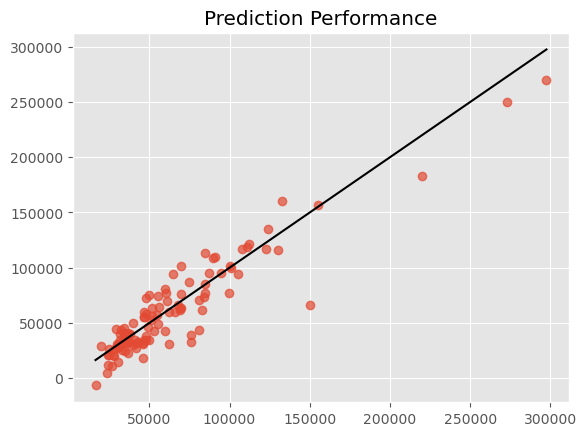

In [216]:
plt.plot(y_test,y_pred,'o',alpha=0.7)
plt.plot([(y_test.min()),(y_test.max())],[(y_test.min()),(y_test.max())],color='black')
plt.title('Prediction Performance')

#### _Evaluate Model Performance_

In [218]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

## Accuracy 🎯

In [220]:
print(f' Mean_squared_error >> {r2}\n\n R2_score >> {r2} \n\n Adjusted_R2_score >> {round(1-((1-r2_score(y_test,y_pred))*len(x_train)-1)/(len(x_train)-len(x.columns)-1),2)}')
print(f'\n MAE  >>  {mae},\n\n RMSE  >> {rmse}')

 Mean_squared_error >> 0.8622081449748344

 R2_score >> 0.8622081449748344 

 Adjusted_R2_score >> 0.85

 MAE  >>  11970.353942968712,

 RMSE  >> 16686.821392033362


In [221]:
#Strong Predictive Power , Effective Feature Engineering

###### An R² of 0.86 indicates that our model explains 86% of the variance in the target variable.
###### This suggests that the model has strong predictive power and is capturing the underlying patterns in the data effectively.

### RESIDUAL PLOT

Text(0.5, 1.0, 'distribution of Residuals')

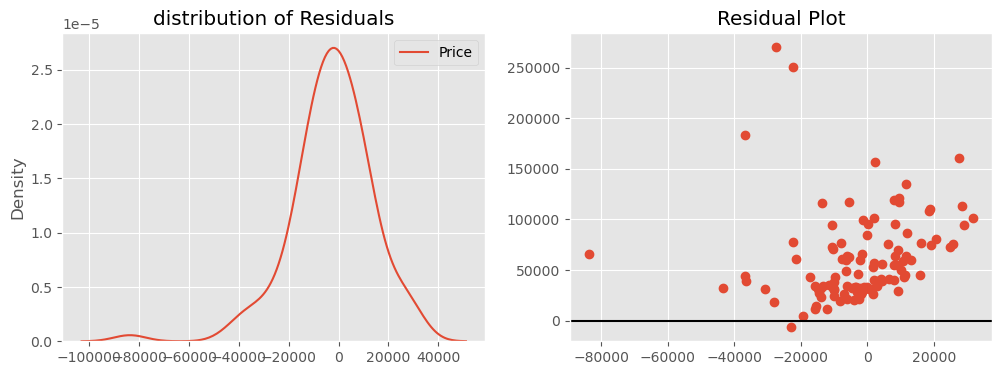

In [224]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax=ax.flatten()
ax[1].plot(y_pred-y_test,y_pred,'o')
ax[1].axhline(y=0,color='black')
ax[1].set_title("Residual Plot")
sns.kdeplot(y_pred-y_test,ax=ax[0])
ax[0].set_title('distribution of Residuals')


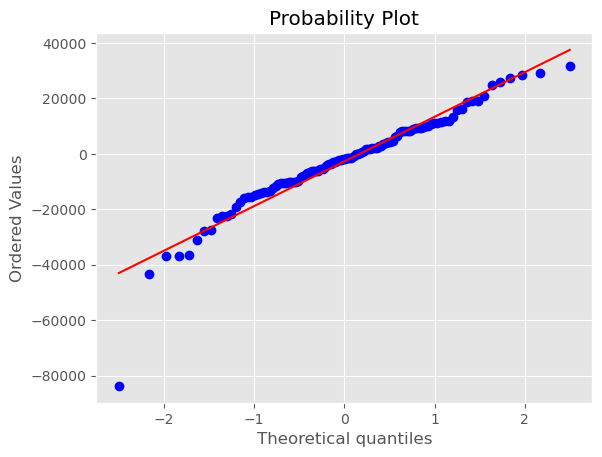

In [225]:
res=(y_pred-y_test)
stats.probplot(np.asarray(res).reshape(110),dist='norm',plot=plt);


## Bringing Predictions to Life: Loading the Trained Model for Action! 🚀📊

In [227]:
import pickle
with open('laptop_pred_new.pkl','wb') as file:
    pickle.dump(pred_model,file)

### Coefficent values of Features 🔽

In [229]:
for i in range(0,len(model.coef_[0])):
    print(f"{x.columns[i]}: {model.coef_[0][i]}")
    print()

Finger Print Sensor: -1471.396751533703

MS Office Provided: 934.2133445713442

Backlit Keyboard: 1902.060094687498

Touchscreen: 18687.066070664496

Face Recognition: -17758.414456802657

Number of Cores: 366.0705835618772

RAM (GB): 21594.96983371331

RAM Type Rank: 1834.7063356821195

SSD (GB): 37.47113367876666

HDD (GB): 4.3042720956604255

ASUS: -4284.602502328417

Acer: -9358.515336591357

Apple: -1256.7784913086566

DELL: 2261.6642531121865

HP: 1355.4111677662725

Infinix: -6986.071363488311

Lenovo: -4104.937676826726

MICROSOFT: 21929.264078268152

MSI: -3560.592240957504

SAMSUNG: 10410.048484952882

others: -6404.890319231915

drive_HDD: 16147.65427810586

drive_Hybrid: -1364.9120793818438

drive_SSD: -11654.084873605752

drive_eMMC: -3128.6573251182376

Dedicated Graphic Memory Capacity (GB): 5810.624844018219

Processor_AMD: -2172.788172541744

Processor_Apple: -1256.7785115734157

Processor_Intel: 5801.248352021172

Processor_MediaTek: -1912.8820099188035

Processor_Qua